In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split

from datetime import datetime as dt
from datetime import date
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv ('treca_faza.csv', parse_dates=[2,5,6,7])
columns = data.columns


In [3]:
features=data[['DATUM_OTVARANJA','PLANIRANI_DATUM_ZATVARANJA', 'NEZAPOSLENOST_OTV','JEDNODNEVNI',
                          'UGOVORENI_IZNOS','VALUTA','VRSTA_KLIJENTA','PROIZVOD','VRSTA_PROIZVODA','VISINA_KAMATE',
                          'TIP_KAMATE','STAROST','PRIJEVREMENI_RASKID','MJESECI','POVIJEST_NEPRIJEVREMENIH',
                          'POVIJEST_PRIJEVREMENIH','ZATVARANJE','OTVARANJE','NADVRSTA','PRICE_INDEX_OTV','GDP_OTV'
 ]]

In [4]:
features.describe()

,NEZAPOSLENOST_OTV,JEDNODNEVNI,UGOVORENI_IZNOS,VALUTA,VRSTA_KLIJENTA,VISINA_KAMATE,STAROST,MJESECI,POVIJEST_NEPRIJEVREMENIH,POVIJEST_PRIJEVREMENIH,ZATVARANJE,OTVARANJE,NADVRSTA,PRICE_INDEX_OTV,GDP_OTV
count,472689.000000,472689.000000,4.726890e+05,472689.000000,472689.000000,469741.000000,472440.000000,472689.000000,472689.000000,472689.000000,472689.000000,472689.000000,472689.000000,472689.000000,4.726890e+05
mean,17.066866,0.044738,3.519604e+05,1.653633,1428.180495,4.575745,46.651162,32.187309,6.308169,1.968815,2014.537586,2011.853908,0.051573,94.631719,5.732498e+10
std,2.445429,0.206728,4.366208e+06,0.820874,70.067921,3.702614,15.761331,40.042930,24.232477,3.628351,3.213422,3.286691,0.221164,6.280253,6.059084e+09
min,9.900000,0.000000,1.000000e+00,1.000000,1110.000000,-0.004000,0.000000,0.000000,0.000000,0.000000,1999.000000,1996.000000,0.000000,63.700000,2.177427e+10
25%,15.000000,0.000000,1.834575e+04,1.000000,1410.000000,1.450000,35.000000,5.000000,0.000000,0.000000,2012.000000,2010.000000,0.000000,92.300000,5.654837e+10
50%,17.400000,0.000000,5.000000e+04,2.000000,1410.000000,3.300000,46.000000,12.000000,1.000000,1.000000,2014.000000,2012.000000,0.000000,95.200000,5.777748e+10
75%,19.100000,0.000000,1.084678e+05,2.000000,1410.000000,8.090000,58.000000,59.000000,5.000000,2.000000,2016.000000,2014.000000,0.000000,100.200000,6.009390e+10
max,21.800000,1.000000,5.696127e+08,5.000000,1610.000000,17.000000,107.000000,420.000000,487.000000,80.000000,2048.000000,2018.000000,1.000000,100.400000,7.047460e+10


Podjela podataka na kredite i depozite.

In [5]:

featuresA = features.loc[features['VRSTA_PROIZVODA'] == 'A'];
featuresL = features.loc[features['VRSTA_PROIZVODA'] == 'L'];

#krediti
featuresA.describe()


,NEZAPOSLENOST_OTV,JEDNODNEVNI,UGOVORENI_IZNOS,VALUTA,VRSTA_KLIJENTA,VISINA_KAMATE,STAROST,MJESECI,POVIJEST_NEPRIJEVREMENIH,POVIJEST_PRIJEVREMENIH,ZATVARANJE,OTVARANJE,NADVRSTA,PRICE_INDEX_OTV,GDP_OTV
count,242512.000000,242512.000000,2.425120e+05,242512.000000,242512.000000,240072.000000,242492.000000,242512.000000,242512.000000,242512.000000,242512.000000,242512.000000,242512.000000,242512.000000,2.425120e+05
mean,16.965923,0.000932,2.014499e+05,1.525636,1418.124546,6.870756,42.097611,53.499555,1.956786,2.462789,2015.099809,2010.639482,0.057696,92.455069,5.780880e+10
std,2.349618,0.030513,3.991897e+06,0.894376,62.235091,3.806559,13.194943,43.766295,11.395459,4.000584,3.787437,3.417982,0.233168,7.309231,7.089591e+09
min,9.900000,0.000000,1.000000e+00,1.000000,1110.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1999.000000,1996.000000,0.000000,63.700000,2.177427e+10
25%,14.700000,0.000000,7.000000e+03,1.000000,1410.000000,5.950000,33.000000,12.000000,0.000000,1.000000,2012.000000,2008.000000,0.000000,88.300000,5.654837e+10
50%,17.400000,0.000000,3.816812e+04,1.000000,1410.000000,7.950000,41.000000,52.000000,1.000000,1.000000,2014.000000,2011.000000,0.000000,94.100000,5.814769e+10
75%,18.600000,0.000000,7.590166e+04,2.000000,1410.000000,9.500000,51.000000,84.000000,1.000000,3.000000,2017.000000,2013.000000,0.000000,99.300000,6.009390e+10
max,21.800000,1.000000,5.696127e+08,5.000000,1610.000000,17.000000,97.000000,420.000000,487.000000,65.000000,2048.000000,2018.000000,1.000000,100.400000,7.047460e+10


In [6]:
#depoziti
featuresL.describe()

,NEZAPOSLENOST_OTV,JEDNODNEVNI,UGOVORENI_IZNOS,VALUTA,VRSTA_KLIJENTA,VISINA_KAMATE,STAROST,MJESECI,POVIJEST_NEPRIJEVREMENIH,POVIJEST_PRIJEVREMENIH,ZATVARANJE,OTVARANJE,NADVRSTA,PRICE_INDEX_OTV,GDP_OTV
count,230177.000000,230177.000000,2.301770e+05,230177.000000,230177.000000,229669.000000,229948.000000,230177.000000,230177.000000,230177.000000,230177.000000,230177.000000,230177.000000,230177.000000,2.301770e+05
mean,17.173218,0.090891,5.105367e+05,1.788489,1438.775334,2.176781,51.453115,9.732958,10.892739,1.448368,2013.945233,2013.133415,0.045122,96.925015,5.681524e+10
std,2.538138,0.287455,4.723455e+06,0.711027,76.043304,1.277806,16.788766,17.085470,32.064212,3.105658,2.325565,2.585330,0.207572,3.802389,4.682977e+09
min,10.000000,0.000000,1.759100e+02,1.000000,1110.000000,-0.004000,0.000000,0.000000,0.000000,0.000000,2009.000000,1999.000000,0.000000,66.300000,2.177427e+10
25%,17.100000,0.000000,2.895526e+04,1.000000,1410.000000,1.200000,39.000000,1.000000,2.000000,0.000000,2012.000000,2011.000000,0.000000,94.100000,5.521309e+10
50%,17.400000,0.000000,7.398845e+04,2.000000,1410.000000,2.200000,52.000000,6.000000,4.000000,1.000000,2014.000000,2013.000000,0.000000,98.500000,5.767131e+10
75%,19.300000,0.000000,1.716439e+05,2.000000,1410.000000,3.200000,64.000000,12.000000,10.000000,2.000000,2016.000000,2015.000000,0.000000,100.200000,5.984421e+10
max,21.800000,1.000000,4.706694e+08,5.000000,1610.000000,10.500000,107.000000,309.000000,487.000000,80.000000,2031.000000,2018.000000,1.000000,100.400000,7.047460e+10


**Distribucija Y-N na svim podatcima**

In [7]:
import seaborn as sns
def featuresCategories(features,category): 
    plt.figure(figsize=(10, 8))
    if category=='PROIZVOD':
        sns.countplot(y=category,data=features,hue='PRIJEVREMENI_RASKID', palette="deep");
    else:
        sns.countplot(x=category,data=features,hue='PRIJEVREMENI_RASKID', palette="deep");

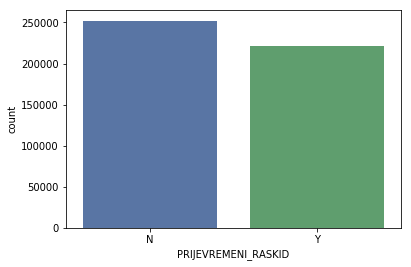

In [8]:
sns.countplot(x='PRIJEVREMENI_RASKID',data=features, palette="deep");


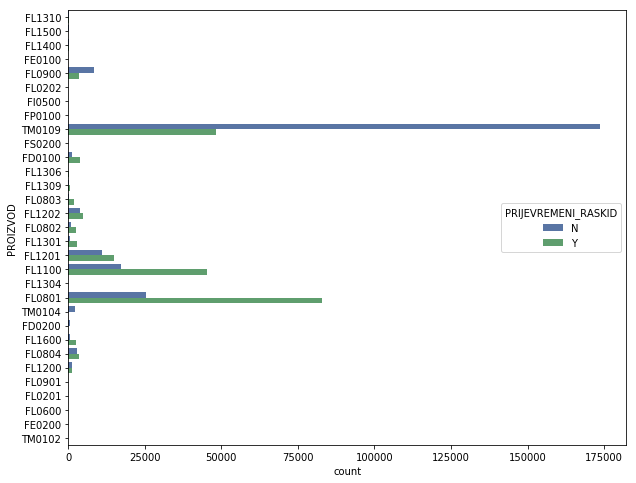

In [9]:
featuresCategories(features,'PROIZVOD')


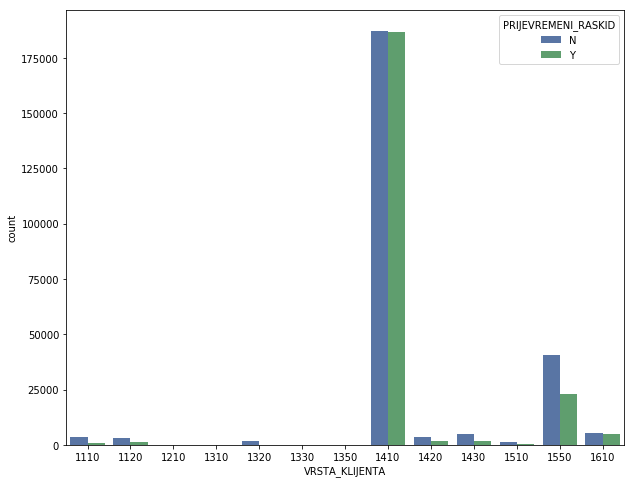

In [10]:
featuresCategories(features,'VRSTA_KLIJENTA')


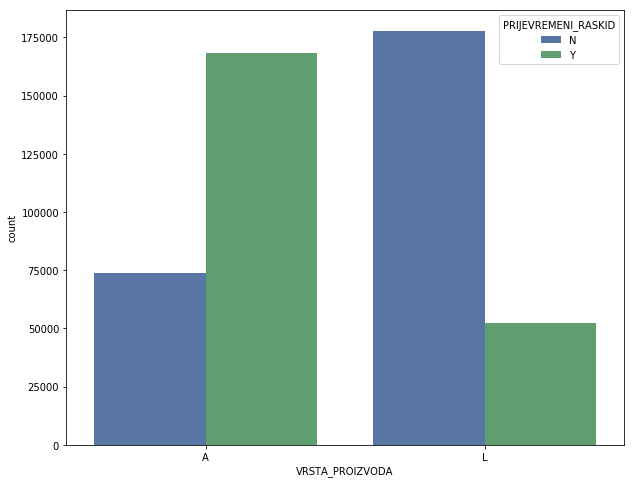

In [11]:
featuresCategories(features,'VRSTA_PROIZVODA')


**Distribucija Y-N na kreditima**

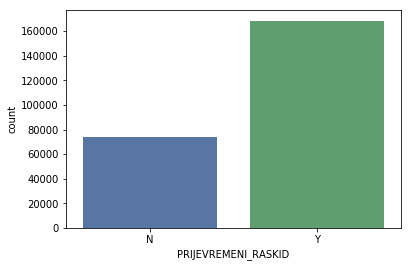

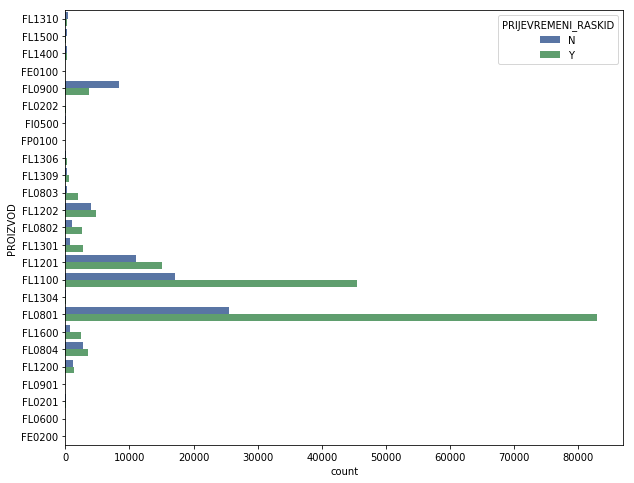

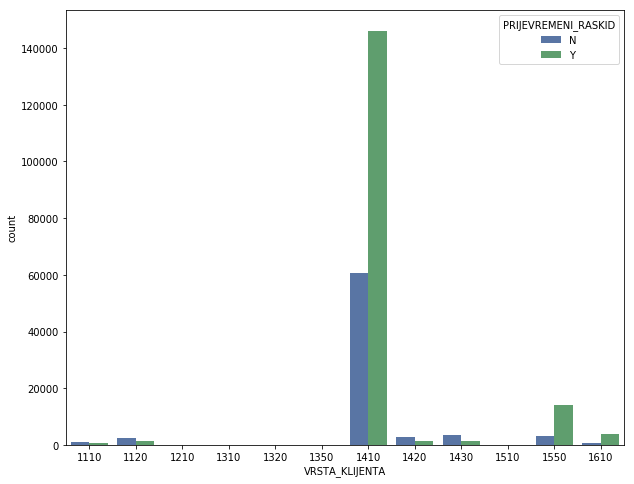

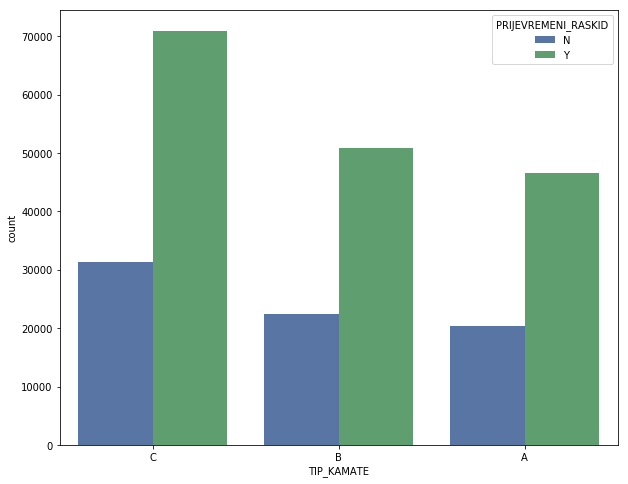

In [12]:
sns.countplot(x='PRIJEVREMENI_RASKID',data=featuresA,palette="deep");
featuresCategories(featuresA,'PROIZVOD')
featuresCategories(featuresA,'VRSTA_KLIJENTA')
featuresCategories(featuresA,'TIP_KAMATE')


**Distribucija Y-N na depozitima**

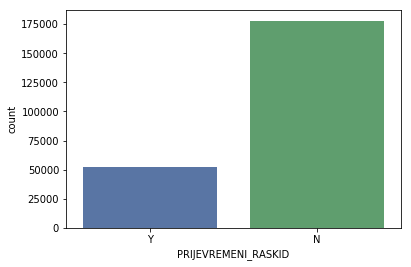

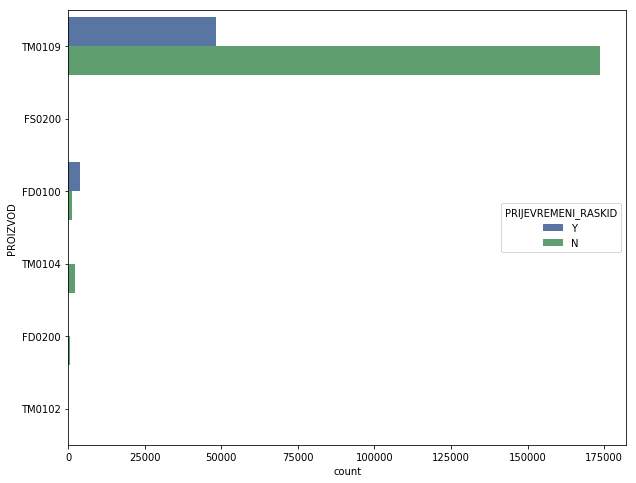

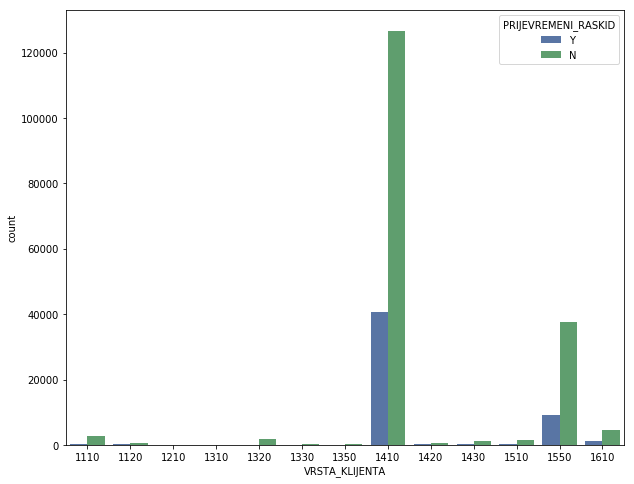

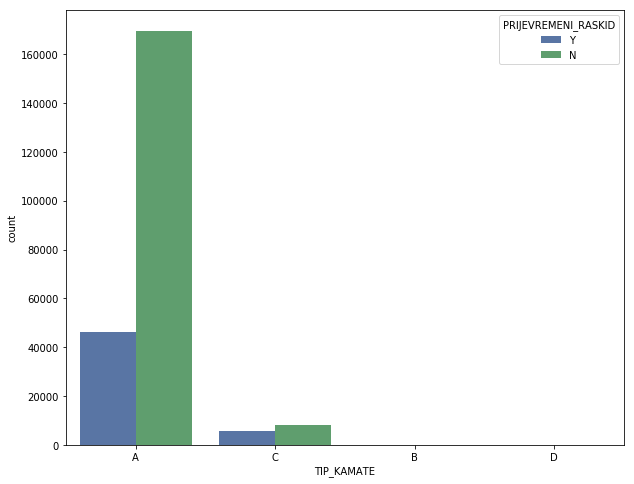

In [13]:
sns.countplot(x='PRIJEVREMENI_RASKID',data=featuresL,palette="deep");
featuresCategories(featuresL,'PROIZVOD')
featuresCategories(featuresL,'VRSTA_KLIJENTA')
featuresCategories(featuresL,'TIP_KAMATE')


In [14]:
#prebacije kategoricke varijable u numericke
def prebaci_kategorije(features_):
    features_["VRSTA_KLIJENTA"] = features_["VRSTA_KLIJENTA"].astype('category')
    features_["VRSTA_KLIJENTA_cat"] = features_["VRSTA_KLIJENTA"].cat.codes
    features_["VALUTA"] = features_["VALUTA"].astype('category')
    features_["VALUTA_cat"] = features_["VALUTA"].cat.codes
    features_["TIP_KAMATE"] = features_["TIP_KAMATE"].astype('category')
    features_["TIP_KAMATE_cat"] = features_["TIP_KAMATE"].cat.codes
    features_["VRSTA_PROIZVODA"] = features_["VRSTA_PROIZVODA"].astype('category')
    features_["VRSTA_PROIZVODA_cat"] = features_["VRSTA_PROIZVODA"].cat.codes
    features_["PROIZVOD"] = features_["PROIZVOD"].astype('category')
    features_["PROIZVOD_cat"] = features_["PROIZVOD"].cat.codes
    
    

# Koreliranost za sve podatke

In [15]:
features = data[['VRSTA_PROIZVODA',
 'POVIJEST_NEPRIJEVREMENIH',
 'VRSTA_KLIJENTA',
 'POVIJEST_PRIJEVREMENIH',
 'ZATVARANJE',
 'TIP_KAMATE',
 'PRICE_INDEX_OTV',
 'MJESECI',
 'GDP_OTV',
 'PROIZVOD',
 'OTVARANJE',
 'VALUTA',
 'NADVRSTA',
 'VISINA_KAMATE',
 'AVG_PLACA_OTV',
 'NEZAPOSLENOST_OTV',
 'JEDNODNEVNI']]

In [16]:
prebaci_kategorije(features)

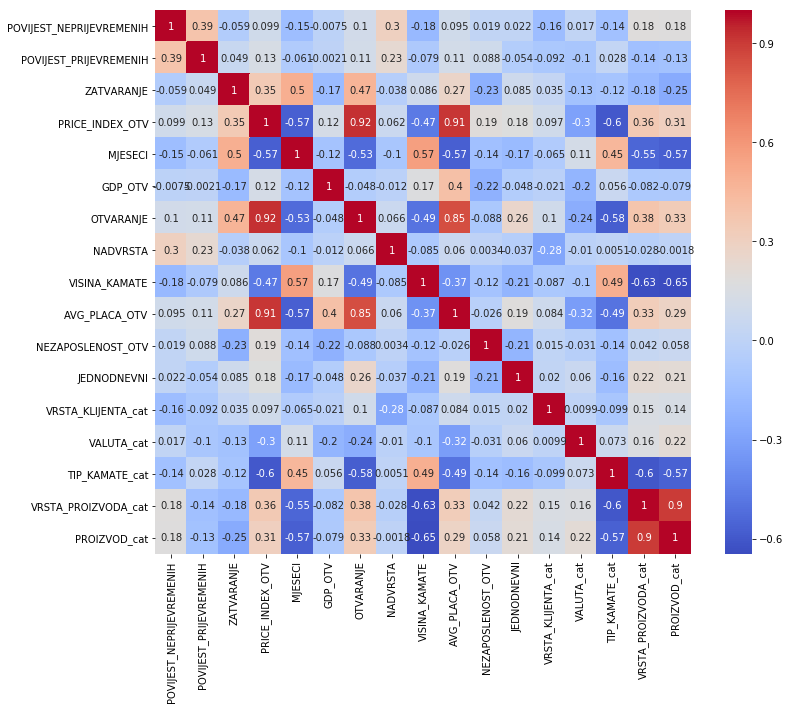

In [17]:
plt.figure(figsize=(12, 10))
sns.heatmap(features.corr(),cmap='coolwarm',annot=True);


# Korelacija na kreditima

In [18]:

featuresA = features.loc[features['VRSTA_PROIZVODA'] == 'A'];
featuresL = features.loc[features['VRSTA_PROIZVODA'] == 'L'];
prebaci_kategorije(featuresA)
prebaci_kategorije(featuresL)

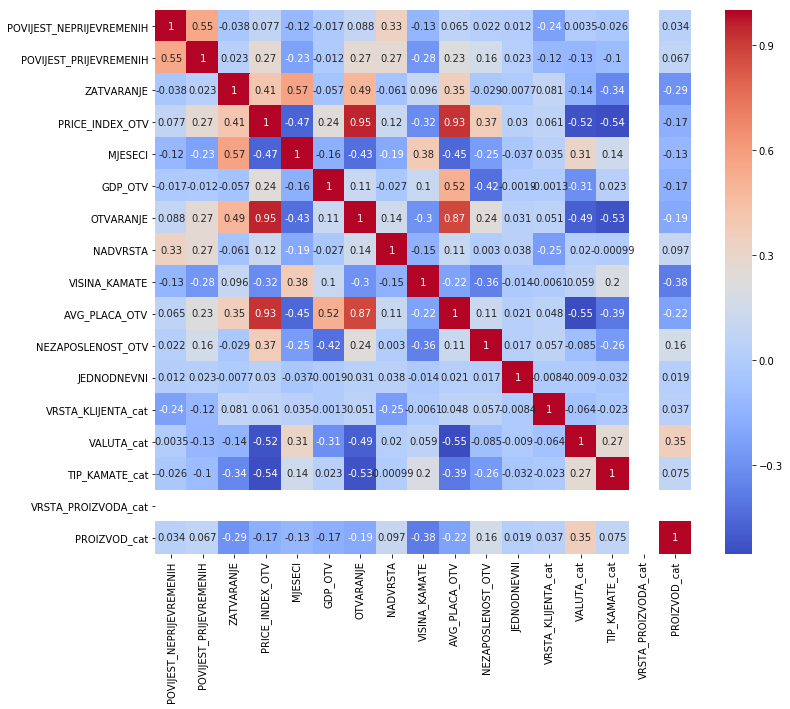

In [19]:
plt.figure(figsize=(12, 10))
sns.heatmap(featuresA.corr(),cmap='coolwarm',annot=True);


# Korelacija na depozitima

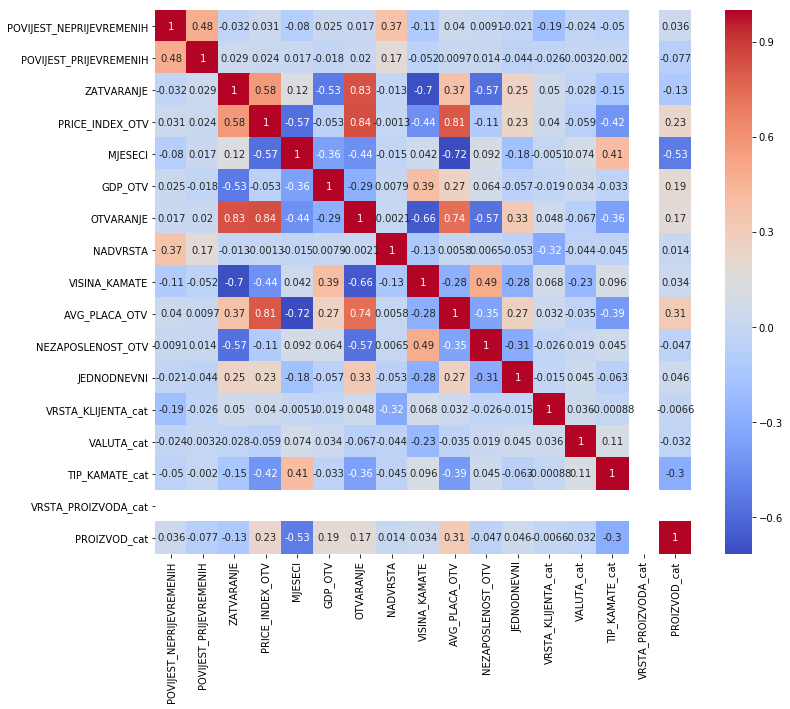

In [20]:
plt.figure(figsize=(12, 10))
sns.heatmap(featuresL.corr(),cmap='coolwarm',annot=True);

# Prikaz ovisnosti vrijednosti značajki s prijevremenošću

In [21]:
features.dtypes


VRSTA_PROIZVODA             category
POVIJEST_NEPRIJEVREMENIH     float64
VRSTA_KLIJENTA              category
POVIJEST_PRIJEVREMENIH       float64
ZATVARANJE                     int64
TIP_KAMATE                  category
PRICE_INDEX_OTV              float64
MJESECI                        int64
GDP_OTV                      float64
PROIZVOD                    category
OTVARANJE                      int64
VALUTA                      category
NADVRSTA                       int64
VISINA_KAMATE                float64
AVG_PLACA_OTV                  int64
NEZAPOSLENOST_OTV            float64
JEDNODNEVNI                    int64
VRSTA_KLIJENTA_cat              int8
VALUTA_cat                      int8
TIP_KAMATE_cat                  int8
VRSTA_PROIZVODA_cat             int8
PROIZVOD_cat                    int8
dtype: object

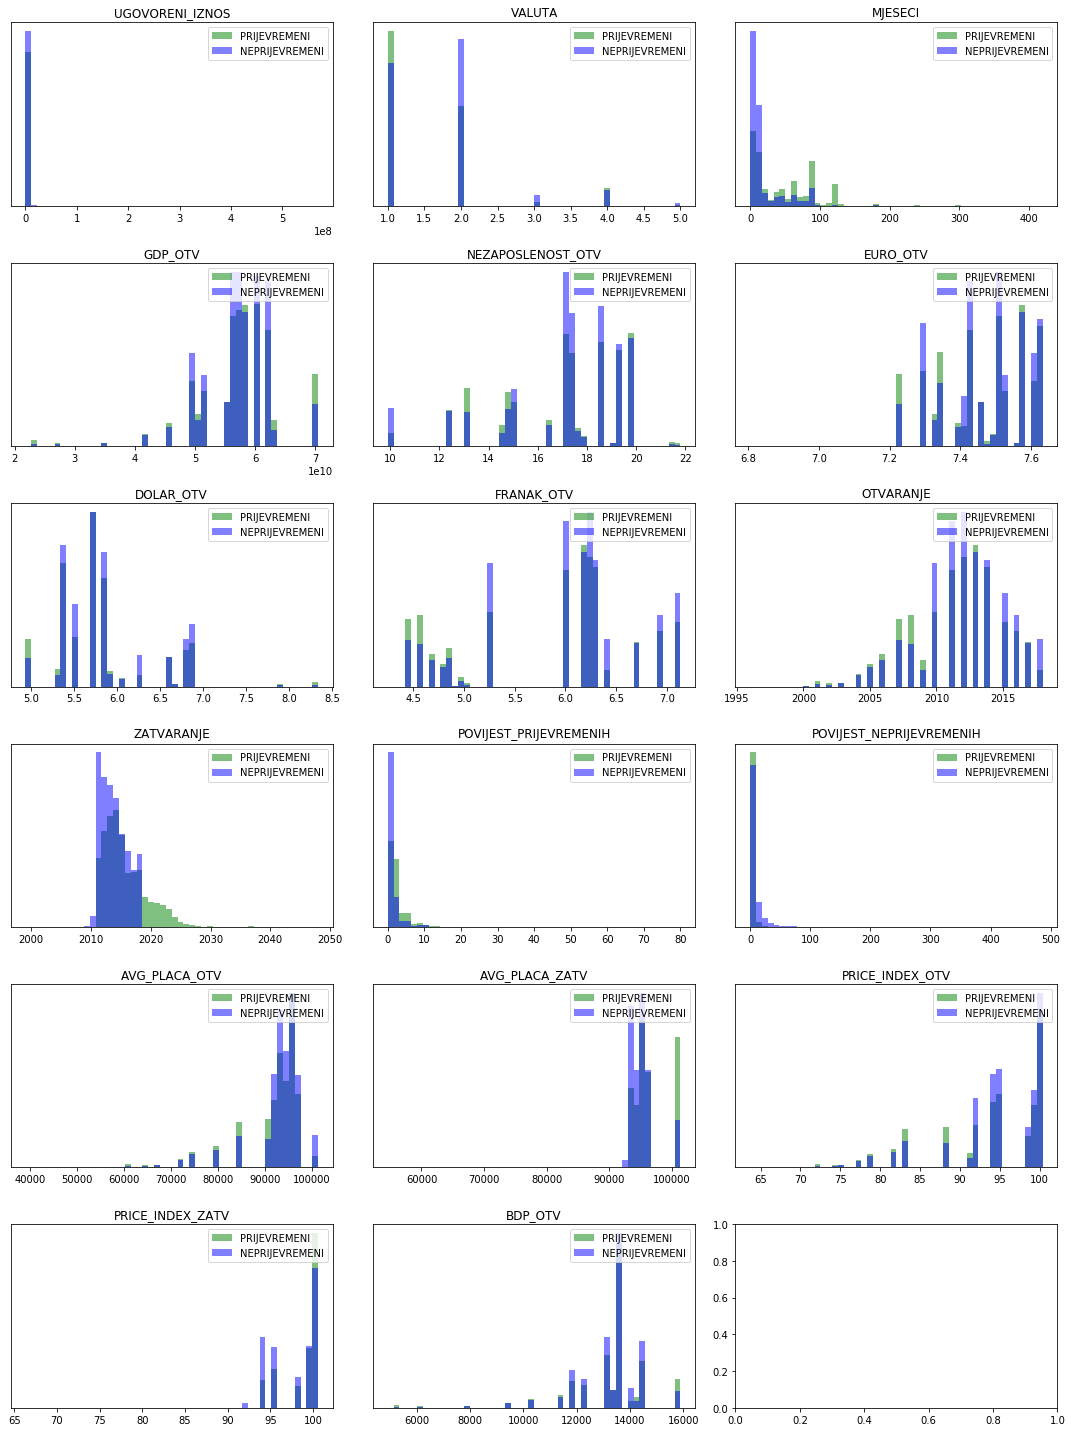

In [22]:

data_plot =data[['UGOVORENI_IZNOS','VALUTA',
                  'MJESECI','GDP_OTV','NEZAPOSLENOST_OTV','EURO_OTV', 'DOLAR_OTV','FRANAK_OTV',
                  'OTVARANJE', 'ZATVARANJE', 'POVIJEST_PRIJEVREMENIH',  
                  'POVIJEST_NEPRIJEVREMENIH','AVG_PLACA_OTV','AVG_PLACA_ZATV',
                  'PRICE_INDEX_OTV' ,'PRICE_INDEX_ZATV' ,'BDP_OTV','PRIJEVREMENI_RASKID' ]]

early = data_plot.loc[ data_plot['PRIJEVREMENI_RASKID'] == 'Y', : ]
not_early = data_plot.loc[ data_plot['PRIJEVREMENI_RASKID'] == 'N', : ]

fig, axes = plt.subplots(6, 3, figsize=(15, 20))
ax = axes.ravel() # axes are 2-dimensional so we unfold them
for i in range(17):
    _, bins = np.histogram(data_plot.iloc[:,i], bins=50)
    ax[i].hist(early.iloc[:,i], bins=bins, color='g', alpha=.5, label='PRIJEVREMENI')
    ax[i].hist(not_early.iloc[:,i], bins=bins, color='b', alpha=.5, label='NEPRIJEVREMENI')
    ax[i].set_title(data_plot.columns.values[i])
    ax[i].set_yticks(()) # remove ticks on y-axis
    ax[i].legend(loc='upper right')
fig.tight_layout()
